In [11]:
#import requird libraries

import pandas as pd
import matplotlib.pyplot as plt
#Set the default plot size
plt.rcParams['figure.figsize']=(18,10)

In [2]:
#load the dataset 
data = pd.read_csv('average-daily-traffic-counts.csv')
data.head(3)

,ID,Traffic Volume Count Location Address,Street,Date of Count,Total Passing Vehicle Volume,Vehicle Volume By Each Direction of Traffic,Latitude,Longitude,Location,Boundaries - ZIP Codes,Community Areas,Zip Codes,Census Tracts,Wards,Historical Wards 2003-2015
0,414,5838 West,Lake St,2006-11-14T08:00:00.000Z,7100,East Bound: 3600 / West Bound: 3500,41.887904,-87.771064,"{'latitude': '41.887904', 'longitude': '-87.77...",32.0,26.0,22216,672.0,7.0,52.0
1,176,320 East,76th St,2006-03-28T08:00:00.000Z,8600,East Bound: 3800 / West Bound: 4800,41.756542,-87.617335,"{'latitude': '41.756542', 'longitude': '-87.61...",61.0,67.0,21546,475.0,32.0,31.0
2,1367,1730 East,57th Dr,2006-08-24T07:00:00.000Z,53500,East Bound: 27800 / West Bound: 25700,41.792663,-87.582231,"{'latitude': '41.792663', 'longitude': '-87.58...",60.0,8.0,22260,502.0,33.0,32.0


In [3]:
# To Get the mean of the data set
data.mean(axis=0)
#This will give an warning because the dataset contains some non numeric values for which mean can't be calculated

/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


ID                                689.937451
Total Passing Vehicle Volume    19466.301798
Latitude                           41.849394
Longitude                         -87.670298
Boundaries - ZIP Codes             32.849921
Community Areas                    37.849921
Zip Codes                       18520.457389
Census Tracts                     369.827668
Wards                              26.774092
Historical Wards 2003-2015         28.432859
dtype: float64

#### 1) Get the average Total Passing Vehicle Volume.

In [4]:
# Get the average volume of traffic for the city

avg = data['Total Passing Vehicle Volume'].mean(axis=0)

print(f'Average traffic count: {round(avg,4)}')

Average traffic count: 19466.3018


### 2) Plot a bar chart
Plot a bar chart using matplotlib which will show average vehicle passing volume through the streets  in a  month.

For this we have to extract the month from 'Date of Count'

In [13]:
#Originally 'Date of Count' column is a str object,
print(type(data['Date of Count'][0]))

#  we have to convert it into a datetime object using to_datetime() method.
#Then from the datetime object we can extract the month.

data['month_from_date'] = pd.to_datetime(data['Date of Count']).dt.month

<class 'str'>


In [14]:
data['month_from_date'].unique()

array([11,  3,  8, 10,  5,  9,  4,  1, 12,  2,  6,  7])

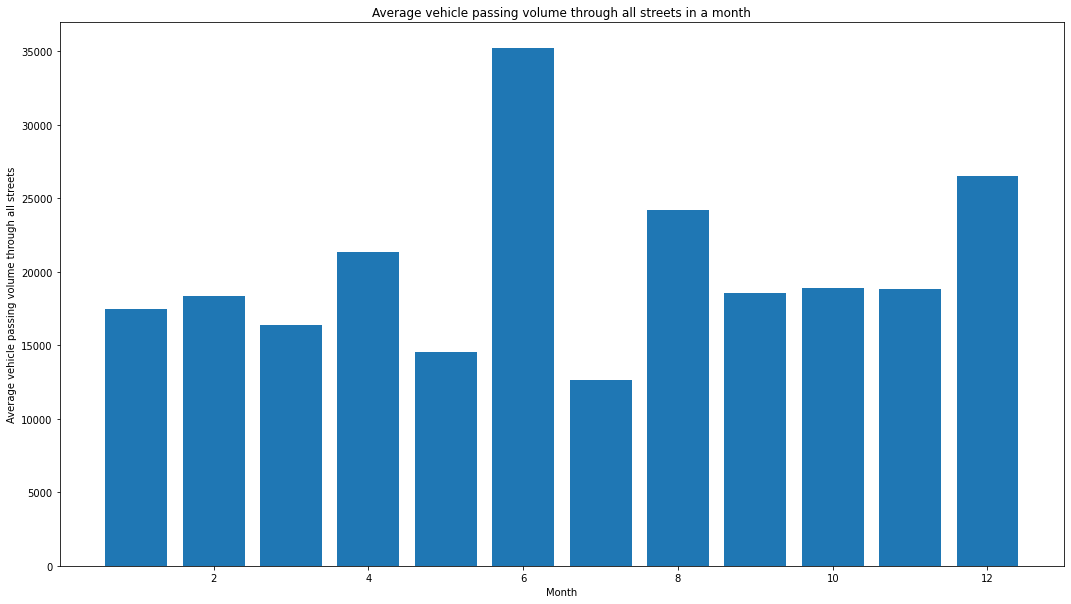

In [15]:
#Perform a group by operation which will group the data according to month and will give mean of vechicle passing volume 

grouped = data.groupby(['month_from_date'])['Total Passing Vehicle Volume'].mean()
#This will generate a Pandas series in index--> Values form

#Now lets plot a bar plot based on the data of this groupby operation
plt.bar(grouped.index, grouped.values, align='center')
plt.xlabel('Month')
plt.ylabel('Average vehicle passing volume through all streets')
plt.title('Average vehicle passing volume through all streets in a month')
plt.show()



The above plot shows that (lets say for the month of january) on an average  17433 vechicles pass through all the streets of Chicago.

In [10]:
data.groupby(['month_from_date'])['Total Passing Vehicle Volume'].mean()

month_from_date
1     17433.333333
2     18366.666667
3     16403.829787
4     21319.148936
5     14543.750000
6     35200.000000
7     12600.000000
8     24182.835821
9     18573.762376
10    18913.424658
11    18853.488372
12    26487.500000
Name: Total Passing Vehicle Volume, dtype: float64